# Stock Price Prediction

The first thing that comes to mind at the mention of finance is strangely most likely ‘stocks’! This is perhaps because companies and individuals alike stand to invest and make money in stock markets. Predicting stock, although enigmatic, can, therefore, be a great area to explore. 

Stock price prediction can be of great importance to investment brokers and (potential) investors alike, and a good forecast prediction can mean actual financial payoffs. The publicly available Kaggle dataset of the Tesla Stock Data from 2010 to 2020 can be used to implement this project. Maybe you could even consider gathering more data from the source of the Tesla Stock dataset. A multiple linear regression model can be used for the implementation of this regression analysis project idea. You could also try the modifications like Lasso or Ridge regression to understand the impact of regularisation on model performance. 


In [1]:
# Installing yfinance
!pip install yfinance

In [2]:
# importing all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Retrieving Stock Data

In [3]:
# import yfinance
import yfinance as yf

# Get apple stock
Apple = yf.Ticker('AAPL')

# Retrieving stock information
Apple_info = Apple.info
print(Apple_info)

{'zip': '95014', 'sector': 'Technology', 'fullTimeEmployees': 100000, 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with o

In [4]:
# Apple country
Apple_country = Apple_info['country']
print('Country : ', Apple_country)

# Apple Sector 
Apple_sector = Apple_info['sector']
print('Sector : ', Apple_sector)

Country :  United States
Sector :  Technology


In [5]:
# Retrieve Stock data for 10 years
Apple_df = Apple.history(period = '10y')

# print first five rows
print(Apple_df.head())
print()

                 Open       High        Low      Close     Volume  Dividends  \
Date                                                                           
2012-02-21  15.501010  15.744742  15.416605  15.744742  605595200        0.0   
2012-02-22  15.690610  15.764310  15.567978  15.689386  483302400        0.0   
2012-02-23  15.751768  15.835867  15.581125  15.791829  568027600        0.0   
2012-02-24  15.892141  15.990918  15.860643  15.975933  415072000        0.0   
2012-02-27  15.942291  16.162171  15.788469  16.078379  547582000        0.0   

            Stock Splits  
Date                      
2012-02-21           0.0  
2012-02-22           0.0  
2012-02-23           0.0  
2012-02-24           0.0  
2012-02-27           0.0  



## Exploratory Data Analysis

In [6]:
# print number of rows and columns
print('Number of rows: ', Apple_df.shape[0])
print('Number of columns: ', Apple_df.shape[1])

Number of rows:  2518
Number of columns:  7


In [7]:
Apple_df['Dividends'].value_counts()

0.000000    2479
0.142500       4
0.192500       4
0.205000       4
0.117500       4
0.220000       4
0.108929       4
0.130000       4
0.182500       4
0.157500       4
0.094643       3
Name: Dividends, dtype: int64

In [8]:
Apple_df['Stock Splits'].value_counts()

0.0    2516
4.0       1
7.0       1
Name: Stock Splits, dtype: int64

Dividends and Stock Splits have a lot of missing values. The columns will be dropped in the data wrangling section

In [9]:
Apple_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03,2518.000000,2518.000000
mean,49.306100,49.826688,48.794082,49.329656,2.106980e+08,0.002426,0.004369
std,41.600084,42.094934,41.113498,41.623576,1.718015e+08,0.019991,0.160640
min,12.039723,12.400632,11.950658,12.119166,4.100000e+07,0.000000,0.000000
25%,21.707218,21.879391,21.475485,21.693264,1.016797e+08,0.000000,0.000000
50%,32.117963,32.267849,32.014105,32.241884,1.481028e+08,0.000000,0.000000
75%,53.752175,54.199491,53.255120,53.776337,2.577596e+08,0.000000,0.000000
max,182.397624,182.707227,178.892080,181.778397,1.460852e+09,0.220000,7.000000


In [10]:
# correlation matrix 
Apple_df.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999898,0.999857,0.999738,-0.419869,0.036716,0.006459
High,0.999898,1.000000,0.999826,0.999865,-0.418097,0.035839,0.006952
Low,0.999857,0.999826,1.000000,0.999868,-0.422672,0.036584,0.006408
Close,0.999738,0.999865,0.999868,1.000000,-0.420587,0.036242,0.006877
Volume,-0.419869,-0.418097,-0.422672,-0.420587,1.000000,-0.036575,0.010030
Dividends,0.036716,0.035839,0.036584,0.036242,-0.036575,1.000000,-0.003302
Stock Splits,0.006459,0.006952,0.006408,0.006877,0.010030,-0.003302,1.000000


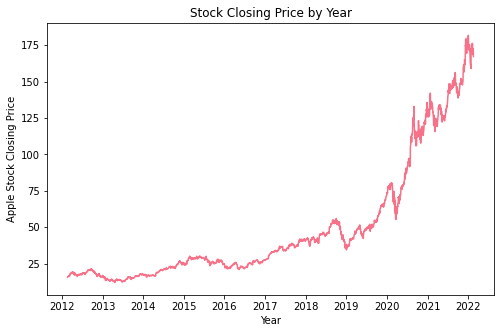

In [11]:
# plot Stock closing price by year
sns.set_palette('husl')
plt.figure(figsize = (8, 5))
plt.plot(Apple_df.index, Apple_df.Close)
plt.xlabel('Year')
plt.ylabel('Apple Stock Closing Price')
plt.title('Stock Closing Price by Year')
plt.show()

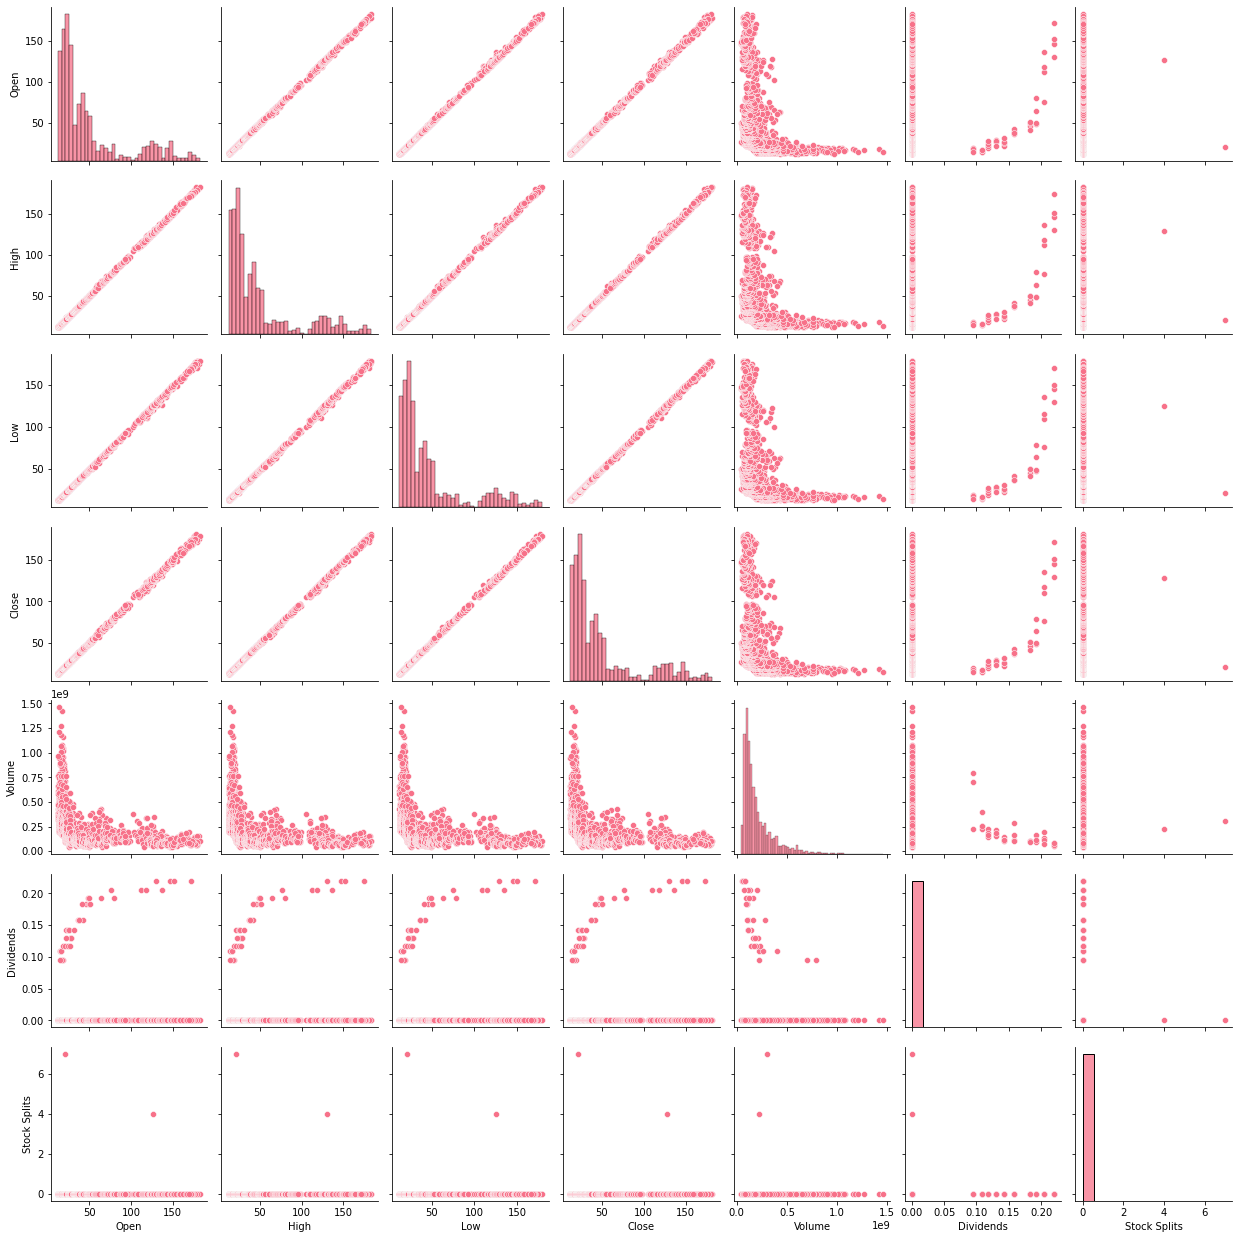

In [12]:
# Pairplot of all variables 
g = sns.pairplot(Apple_df)
plt.show()

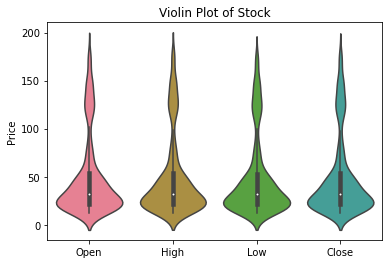

In [13]:
# Boxplot
g = sns.violinplot(data = Apple_df.drop(['Volume', 'Dividends', 'Stock Splits'], axis = 1))
g.set(xlabel = '',
     ylabel = 'Price',
     title = 'Violin Plot of Stock')
plt.show()

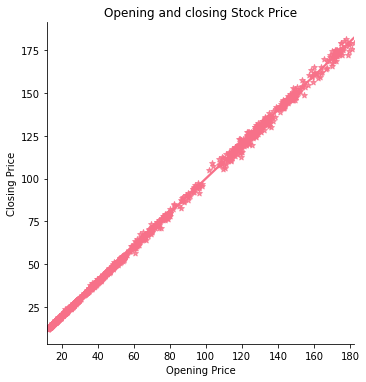

In [14]:
# Checking relationship between Open and Close Price
g = sns.lmplot(x = 'Open', y = 'Close', data = Apple_df, markers = '*')
g.set(xlabel = 'Opening Price',
     ylabel = 'Closing Price',
     title = 'Opening and closing Stock Price')
plt.show()

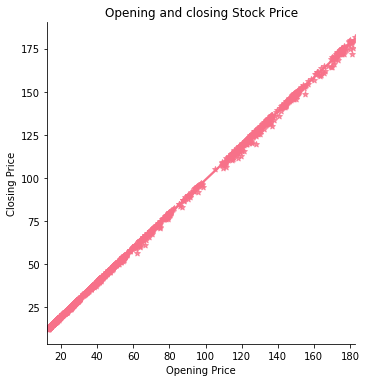

In [15]:
# relationship between High and Close
g = sns.lmplot(x = 'High', y = 'Close', data = Apple_df, markers = '*')
g.set(xlabel = 'Opening Price',
     ylabel = 'Closing Price',
     title = 'Opening and closing Stock Price')
plt.show()

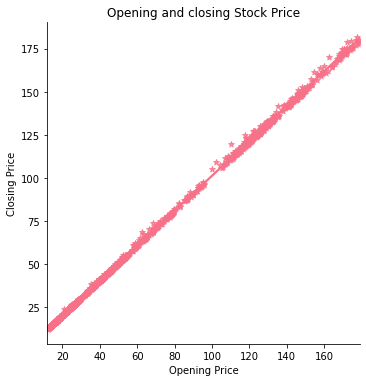

In [16]:
# Relationship between Low and Close
g = sns.lmplot(x = 'Low', y = 'Close', data = Apple_df, markers = '*')
g.set(xlabel = 'Opening Price',
     ylabel = 'Closing Price',
     title = 'Opening and closing Stock Price')
plt.show()

## Data Wrangling

In [17]:
# drop the 
df = Apple_df.drop(['Volume', 'Dividends', 'Stock Splits'], axis = 1)

In [18]:
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

No missing value in the data collected

## Modeling

In [19]:
# importing all Libraries needed in this section
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse 

#specifying X and Y
X = df.drop(['Close'], axis = 1)
Y = df['Close']

# splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

#### Linear Regression

In [20]:
# Without Scaling and Hyperparameter tuning
linreg = LinearRegression().fit(X_train, Y_train)
Yhat = linreg.predict(X_test)

# Metrics
print('R2 score: ', r2_score(Y_test, Yhat))
print('Mean Squared Error: ', mse(Y_test, Yhat))
print('Root Mean Squared Error: ', np.sqrt(mse(Y_test, Yhat)))

R2 score:  0.9998697483563015
Mean Squared Error:  0.2061399162440349
Root Mean Squared Error:  0.45402633871179204


In [21]:
# scale inputs and model a linear regressionlinreg = LinearRegression()
steps = [('scaler', StandardScaler()),
        ('linreg', LinearRegression())]

pipeline = Pipeline(steps)
param_grid = {'linreg__n_jobs': np.arange(1, 10),
             'linreg__positive': [False, True]}

lin_cv = GridSearchCV(pipeline, param_grid, cv = 5)
lin_cv.fit(X_train, Y_train)

Yhat = lin_cv.predict(X_test)

In [22]:
best_score = lin_cv.best_score_
best_parameters = lin_cv.best_params_

print('Best score: ', best_score)
print('Best Parameters: ', best_parameters)

Best score:  0.9998744081203712
Best Parameters:  {'linreg__n_jobs': 1, 'linreg__positive': False}


In [23]:
print('R2 Score: ', r2_score(Y_test, Yhat))
print('Mean squared Error: ', mse(Y_test, Yhat))
print('Root Mean Squared Error: ', np.sqrt(mse(Y_test, Yhat)))

R2 Score:  0.9998697483563015
Mean squared Error:  0.20613991624403563
Root Mean Squared Error:  0.4540263387117928


#### Lasso Regression

In [24]:
# Without scaling
lasso_reg = Lasso().fit(X_train, Y_train)
lasso_reg_pred = lasso_reg.predict(X_test)

# Metrics
print('R2 score: ', r2_score(Y_test,lasso_reg_pred))
print('Mean Squared Error: ', mse(Y_test, lasso_reg_pred))
print('Root Mean Squared Error: ', np.sqrt(mse(Y_test, lasso_reg_pred)))

R2 score:  0.9995607739941439
Mean Squared Error:  0.6951314354921168
Root Mean Squared Error:  0.8337454260696827


C:\Users\Toyin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.959e+02, tolerance: 3.162e+02
  model = cd_fast.enet_coordinate_descent(


In [25]:
# With Scaling and tuning
steps = [('scaler', StandardScaler()),
        ('lassoreg', Lasso())]
pipeline = Pipeline(steps)
param_grid = {'lassoreg__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'lassoreg__max_iter': [10000, 100000]}
lasso_cv = GridSearchCV(pipeline, param_grid, cv = 5)
lasso_cv.fit(X_train, Y_train)
lasso_cv_pred = lasso_cv.predict(X_test)

In [26]:
# best parameters and best score
print('Best Score: ', lasso_cv.best_score_)
print('Best Parameters : ', lasso_cv.best_params_)
print()

# metrics on test data
print('R2 score: ', r2_score(Y_test,lasso_cv_pred))
print('Mean Squared Error: ', mse(Y_test, lasso_cv_pred))
print('Root Mean Squared Error: ', np.sqrt(mse(Y_test, lasso_cv_pred)))

Best Score:  0.9998515863505695
Best Parameters :  {'lassoreg__alpha': 1e-05, 'lassoreg__max_iter': 10000}

R2 score:  0.9998369834325889
Mean Squared Error:  0.2579946064273006
Root Mean Squared Error:  0.5079316946473222


#### Ridge Regression

In [27]:
# without scaling and tuning
ridge_reg = Ridge().fit(X_train, Y_train)
ridge_reg_pred = ridge_reg.predict(X_test)

print('R2 score: ', r2_score(Y_test, ridge_reg_pred))
print('Mean Squared Error: ', mse(Y_test, ridge_reg_pred))
print('Root Mean Squared Error: ', np.sqrt(mse(Y_test, ridge_reg_pred)))

R2 score:  0.9998697189649789
Mean Squared Error:  0.20618643177809795
Root Mean Squared Error:  0.45407756141225253


In [28]:
# Scaled and tuned
steps = [('scaler', StandardScaler()),
        ('ridgereg', Ridge())]
pipeline = Pipeline(steps)
param_grid = {'ridgereg__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'ridgereg__max_iter': [10000, 100000],
             'ridgereg__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
             }
ridge_cv = GridSearchCV(pipeline, param_grid, cv = 5)
ridge_cv.fit(X_train, Y_train)
ridge_cv_pred = ridge_cv.predict(X_test)

In [29]:
print('Best Score: ', ridge_cv.best_score_)
print('Best Parameters: ', ridge_cv.best_params_)
print()

print('R2 score: ', r2_score(Y_test, ridge_cv_pred))
print('Mean Squared Error: ', mse(Y_test, ridge_cv_pred))
print('Root Mean Squared Error: ', np.sqrt(mse(Y_test, ridge_cv_pred)))

Best Score:  0.9998744554818113
Best Parameters:  {'ridgereg__alpha': 0.001, 'ridgereg__max_iter': 10000, 'ridgereg__solver': 'auto'}

R2 score:  0.9998696965211723
Mean Squared Error:  0.20622195197797324
Root Mean Squared Error:  0.4541166722087764


#### ElasticNet Regression

In [30]:
elasticnet_reg = ElasticNet().fit(X_train, Y_train)
elasticnet_reg_pred = elasticnet_reg.predict(X_test)

print('R2 score: ', r2_score(Y_test, elasticnet_reg_pred))
print('Mean Squared Error: ', mse(Y_test, elasticnet_reg_pred))
print('Root Mean Squared Error: ', np.sqrt(mse(Y_test, elasticnet_reg_pred)))

R2 score:  0.9996337774677977
Mean Squared Error:  0.5795940839686273
Root Mean Squared Error:  0.7613107670121495


C:\Users\Toyin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.431e+02, tolerance: 3.162e+02
  model = cd_fast.enet_coordinate_descent(


Having tried different regressors and with some hyperparameter tuning, the dataset still performed best on a simple Linear Regressor.

In [31]:
# saving model in a file
import pickle

filename = 'model.sav'
pickle.dump(linreg, open(filename, 'wb'))

model = pickle.load(open('model.sav', 'rb'))

In [37]:
data = [46.516098, 47.336443, 46.506363]
data = np.array(data).reshape(1, -1)
model.predict(data)

C:\Users\Toyin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47.17087685])